In [1]:
import numpy as np
import csv
import datetime
import time

In [2]:
def addElement(array, index, ele):
    if array and index < len(array):
        array[index] += ele
        return array
    newArray = [0] * (index + 1)
    if array:
        newArray[:len(array)] = array
    newArray[index] = ele
    return newArray

In [ ]:
trafficRecordsById = {}
startTime = 1433142000

with open("new.csv") as f:
    trafficRecords = csv.reader(f, delimiter=',')
    count = 0
    for trafficRecord in trafficRecords:
        if count % 100000 == 0:
            print (count / 24015249 * 100, "%")
#         if count == 30000:
#             break
        recordTime = trafficRecord[1]
        checkPointId = trafficRecord[2]
        lane = int(trafficRecord[3])
        traffic = int(trafficRecord[4])

        relativeTime = time.mktime(datetime.datetime.strptime(recordTime, "%Y-%m-%d %H:%M:%S").timetuple()) - startTime
#         print (relativeTime)
        intervalId = relativeTime // 300
#         print (intervalId)
        
        trafficRecordsForId = trafficRecordsById.get(checkPointId)
        if not trafficRecordsForId:
            trafficByLane = addElement(None, lane, traffic)
            trafficRecordsById[checkPointId] = [(intervalId, trafficByLane)]
        else:
            prevIntervalId = trafficRecordsForId[-1][0]
            prevTrafficByLane = trafficRecordsForId[-1][1]
            if (intervalId == prevIntervalId):
                trafficRecordsForId[-1] = (intervalId, addElement(prevTrafficByLane, lane, traffic))
            else:
                trafficRecordsForId.append((intervalId, addElement(None, lane, traffic)))
        count += 1
                

import pickle

pickle.dump(trafficRecordsById, open("trafficRecordsById.p", "wb"))
    

In [3]:
import pickle
trafficRecordsByIdLoaded = pickle.load(open("trafficRecordsById.p", "rb"))

In [4]:
def checkMissingSpots(checkPointId):
    trafficRecordsForId = trafficRecordsByIdLoaded.get(checkPointId)
    prevIndex = -1
    for trafficRecord in trafficRecordsForId:
        intervalId = trafficRecord[0]
        if intervalId != prevIndex + 1:
            print (prevIndex + 1, intervalId - 1)
        prevIndex = intervalId

running
True
plot


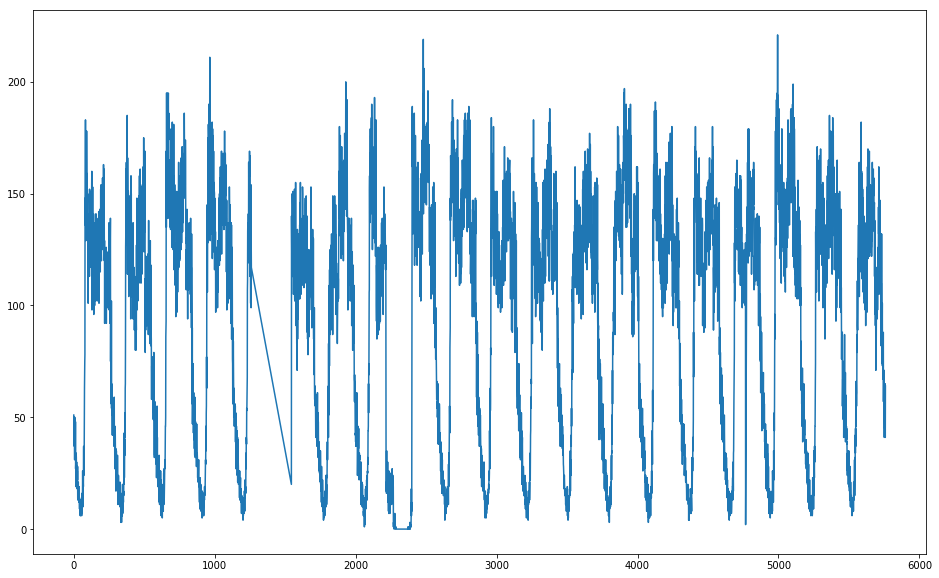

[(0.0, [24, 9, 5, 13]),
 (1.0, [17, 8, 4, 15]),
 (2.0, [18, 11, 5, 16]),
 (3.0, [15, 11, 3, 19]),
 (4.0, [17, 8, 1, 11]),
 (5.0, [18, 10, 3, 13]),
 (6.0, [12, 8, 1, 10]),
 (7.0, [19, 11, 4, 16]),
 (8.0, [16, 9, 3, 13]),
 (9.0, [15, 8, 1, 8]),
 (10.0, [14, 4, 2, 12]),
 (11.0, [9, 6, 4, 15]),
 (12.0, [23, 8, 2, 15]),
 (13.0, [14, 5, 2, 6]),
 (14.0, [13, 1, 4, 11]),
 (15.0, [11, 2, 2, 4]),
 (16.0, [8, 3, 2, 8]),
 (17.0, [14, 3, 3, 14]),
 (18.0, [15, 11, 1, 5]),
 (19.0, [12, 3, 2, 6]),
 (20.0, [14, 6, 2, 8]),
 (21.0, [7, 4, 0, 11]),
 (22.0, [11, 3, 1, 5]),
 (23.0, [10, 7, 0, 10]),
 (24.0, [7, 6, 0, 5]),
 (25.0, [12, 3, 0, 11]),
 (26.0, [8, 3, 1, 10]),
 (27.0, [12, 7, 1, 8]),
 (28.0, [6, 4, 1, 3]),
 (29.0, [5, 2, 2, 4]),
 (30.0, [5, 2, 1, 10]),
 (31.0, [8, 4, 0, 2]),
 (32.0, [9, 3, 1, 8]),
 (33.0, [7, 3, 0, 3]),
 (34.0, [5, 4, 0, 7]),
 (35.0, [10, 2, 0, 3]),
 (36.0, [6, 1, 1, 8]),
 (37.0, [6, 4, 0, 9]),
 (38.0, [5, 1, 1, 5]),
 (39.0, [6, 2, 0, 6]),
 (40.0, [3, 3, 1, 5]),
 (41.0, [4, 2, 1, 2

In [5]:
import matplotlib.pyplot as plt
import bisect
def plotTrafficDistribution(checkPointId, timeRange=(None, None), plot=True):
    print ("running")
    trafficRecordsForId = trafficRecordsByIdLoaded.get(checkPointId)
    if trafficRecordsForId is None:
        print ("traffic records for id is None")
        return
    keys = [ele[0] for ele in trafficRecordsForId]
    
    startIntervalId = timeRange[0]
    endIntervalId = timeRange[1]

    startIndex = 0
    endIndex = len(trafficRecordsForId)
    
    if startIntervalId is not None:
        startIndex = bisect.bisect_left(keys, startIntervalId)
    
    if endIntervalId is not None:
        endIndex = bisect.bisect_right(keys, endIntervalId)
        
    print (plot)
    if plot:
        print ("plot")
        x, y = zip(*((ele[0], sum(ele[1])) for ele in trafficRecordsForId[startIndex: endIndex]))

        plt.figure(figsize=(16, 10))
        plt.plot(x, y)
        plt.show()
        
    return trafficRecordsForId[startIndex: endIndex]
    
plotTrafficDistribution("704", plot=True)    
    

In [6]:
checkMissingSpots("109")

0 475.0
477.0 712.0
714.0 860.0
862.0 872.0
874.0 2221.0
2223.0 2424.0
2426.0 2431.0
2433.0 2436.0
2438.0 2779.0
2781.0 4201.0
4203.0 4338.0
4340.0 4686.0
4688.0 5001.0
5003.0 5191.0
5193.0 5649.0
5651.0 5717.0
5719.0 5726.0


In [59]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

def mape(y_true, y_pred):
    yTrueFiltered = []
    yPredFiltered = []
    
    for index, trueValue in enumerate(y_true):
        if trueValue < 5:
            continue
        yTrueFiltered.append(trueValue)
        yPredFiltered.append(y_pred[index])
        
    yTrueFiltered = np.array(yTrueFiltered)
    yPredFiltered = np.array(yPredFiltered)
    return np.mean(np.abs((yTrueFiltered - yPredFiltered) / (yTrueFiltered) * 100))

def intervalToRecords(trafficRecordsForId):
    intervalToRecordsMap = {}
    if trafficRecordsForId is None:
        return intervalToRecordsMap
    for trafficRecord in trafficRecordsForId:
        if sum(trafficRecord[1]) < 400:
            intervalToRecordsMap[trafficRecord[0]] = trafficRecord[1]
    return intervalToRecordsMap

def getTrafficRecordDefaultNone(intervalToRecordsMap, intervalId, missingDataMap):
    return sum(intervalToRecordsMap.get(intervalId)) if intervalToRecordsMap.get(intervalId) is not None else missingDataMap.get(intervalId % 288)

def imputeMissingData(trafficRecordsForId):
    missingDataMap = {}
    for trafficRecord in trafficRecordsForId:
        if (trafficRecord[0] % 288) not in missingDataMap:
            missingDataMap[trafficRecord[0] % 288] = [sum(trafficRecord[1])]
        else:
            missingDataMap[trafficRecord[0] % 288].append(sum(trafficRecord[1]))
    for key, valueList in missingDataMap.items():
        missingDataMap[key] = sum(valueList) / len(valueList)
    for i in range(288):
        if i not in missingDataMap:
            before = 0
            for j in range(i - 1, -1, -1):
                if j in missingDataMap:
                    before = missingDataMap[j]
                    break
            after = None
            for j in range(i + 1, 288):
                if j in missingDataMap:
                    after = missingDataMap[j]
                    break
            missingDataMap[i] = (before + (after or before)) // 2
    return missingDataMap

daysLookBack = 7
splitIntervalId = 288 * 16 - 1
# def createDatasetSinglePoint(checkPointId):
#     trafficRecordsForId = trafficRecordsByIdLoaded.get(checkPointId)
#     missingDataMap = imputeMissingData(trafficRecordsForId)
#     intervalToRecordsMap = intervalToRecords(trafficRecordsForId)
#     X_train = []
#     y_train = []
    
#     X_test = []
#     y_test = []
#     print ("length of trafficRecordsForId", len(trafficRecordsForId))
#     for trafficRecord in trafficRecordsForId:
#         intervalId = trafficRecord[0]
#         timeIntervalWeek = (intervalId % (288 * 7)) // 288
#         toAppend = [timeInterval]
# #         for i in (0, 7):
#         for i in range(daysLookBack):
#             if intervalId <= splitIntervalId:
#                 intervalWrappedAround0 = (intervalId - i * 288 - 0) % (splitIntervalId + 1)
#                 intervalWrappedAround1 = (intervalId - i * 288 - 1) % (splitIntervalId + 1)
#                 intervalWrappedAround2 = (intervalId - i * 288 - 2) % (splitIntervalId + 1)
#                 intervalWrappedAround3 = (intervalId - i * 288 - 3) % (splitIntervalId + 1)
#                 intervalWrappedAround4 = (intervalId - i * 288 - 4) % (splitIntervalId + 1)
#             else:
#                 intervalWrappedAround0 = (intervalId - i * 288 - 0)
#                 intervalWrappedAround1 = (intervalId - i * 288 - 1)
#                 intervalWrappedAround2 = (intervalId - i * 288 - 2)
#                 intervalWrappedAround3 = (intervalId - i * 288 - 3)
#                 intervalWrappedAround4 = (intervalId - i * 288 - 4)

#             traffic1 = getTrafficRecordDefaultNone(intervalToRecordsMap, intervalWrappedAround1, missingDataMap)
#             traffic2 = getTrafficRecordDefaultNone(intervalToRecordsMap, intervalWrappedAround2, missingDataMap)
#             traffic3 = getTrafficRecordDefaultNone(intervalToRecordsMap, intervalWrappedAround3, missingDataMap)
#             traffic4 = getTrafficRecordDefaultNone(intervalToRecordsMap, intervalWrappedAround4, missingDataMap)
            
#             trafficDelta1 = (traffic1 - traffic2) if None not in (traffic1, traffic2) else None
#             trafficDelta2 = (traffic2 - traffic3) if None not in (traffic2, traffic3) else None
#             trafficDelta3 = (traffic3 - traffic4) if None not in (traffic3, traffic4) else None
            
#             toAppend.extend([traffic1, traffic2, traffic3, traffic4, trafficDelta1, trafficDelta2, trafficDelta3])
            
#             if i != 0:
#                 traffic0 = getTrafficRecordDefaultNone(intervalToRecordsMap, intervalWrappedAround0, missingDataMap)
#                 toAppend.append(traffic0)

# #         print (traffic1, traffic2, traffic3)
#         if None in toAppend:
#             print ("toAppend", toAppend)
#             continue
# #         print (len(toAppend))
#         if intervalId <= splitIntervalId:
#             y_train.append(sum(trafficRecord[1]))
#             X_train.append(toAppend)
#         else:
#             y_test.append(sum(trafficRecord[1]))
#             X_test.append(toAppend)
#     return X_train, y_train, X_test, y_test

def createDatasetWithSurroundingPoints(checkPointId, additionalPoints):
    additionalPoints.append(checkPointId)
    trafficRecords = list(map(trafficRecordsByIdLoaded.get, additionalPoints))
    nonNoneTrafficRecords = [ele for ele in trafficRecords if ele is not None]
    if None in trafficRecords:
        for r in range(len(trafficRecords)):
            if trafficRecords[r] is None:
                print ("the index of None is", r)
        print ("trafficRecords has None. additionalPoints:", additionalPoints)
    intervalToRecordsMapsSurroundings = list(map(intervalToRecords, nonNoneTrafficRecords))
    missingDataMapsSurroundings = list(map(imputeMissingData, nonNoneTrafficRecords))
    print ("intervalToRecordsMapsSurroundings", len(intervalToRecordsMapsSurroundings), \
            "missingDataMapsSurroundings", len(missingDataMapsSurroundings))
    X_train = []
    y_train = []
    
    X_test = []
    y_test = []
    trafficRecordsForId = trafficRecordsByIdLoaded.get(checkPointId)
    for trafficRecord in trafficRecordsForId:
        intervalId = trafficRecord[0]
        timeIntervalWeek = (intervalId % (288 * 7)) // 288
        timeIntervalDay = intervalId % 288
        toAppend = [timeIntervalWeek, timeIntervalDay]
#         for i in (0, 7):
        for i in range(daysLookBack):
            if intervalId <= splitIntervalId:
                intervalWrappedAround0 = (intervalId - i * 288 - 0) % (splitIntervalId + 1)
                intervalWrappedAround1 = (intervalId - i * 288 - 1) % (splitIntervalId + 1)
                intervalWrappedAround2 = (intervalId - i * 288 - 2) % (splitIntervalId + 1)
                intervalWrappedAround3 = (intervalId - i * 288 - 3) % (splitIntervalId + 1)
                intervalWrappedAround4 = (intervalId - i * 288 - 4) % (splitIntervalId + 1)
            else:
                intervalWrappedAround0 = (intervalId - i * 288 - 0)
                intervalWrappedAround1 = (intervalId - i * 288 - 1)
                intervalWrappedAround2 = (intervalId - i * 288 - 2)
                intervalWrappedAround3 = (intervalId - i * 288 - 3)
                intervalWrappedAround4 = (intervalId - i * 288 - 4)

            for j in range(len(intervalToRecordsMapsSurroundings)):
                intervalToRecordsMapSurroundings = intervalToRecordsMapsSurroundings[j]
                missingDataMapSurroundings = missingDataMapsSurroundings[j]
                traffic0 = getTrafficRecordDefaultNone(intervalToRecordsMapSurroundings, intervalWrappedAround0, missingDataMapSurroundings)
                traffic1 = getTrafficRecordDefaultNone(intervalToRecordsMapSurroundings, intervalWrappedAround1, missingDataMapSurroundings)
                traffic2 = getTrafficRecordDefaultNone(intervalToRecordsMapSurroundings, intervalWrappedAround2, missingDataMapSurroundings)
                traffic3 = getTrafficRecordDefaultNone(intervalToRecordsMapSurroundings, intervalWrappedAround3, missingDataMapSurroundings)
                traffic4 = getTrafficRecordDefaultNone(intervalToRecordsMapSurroundings, intervalWrappedAround4, missingDataMapSurroundings)

                trafficDelta0 = traffic0 - traffic1 if None not in (traffic0, traffic1) else None
                trafficDelta1 = traffic1 - traffic2 if None not in (traffic1, traffic2) else None
                trafficDelta2 = traffic2 - traffic3 if None not in (traffic2, traffic3) else None
                trafficDelta3 = traffic3 - traffic4 if None not in (traffic3, traffic4) else None
                
#                 trafficDelta0 = (traffic0 - traffic1)/traffic1 if None not in (traffic0, traffic1) and traffic1 != 0 else None
#                 trafficDelta1 = (traffic1 - traffic2)/traffic2 if None not in (traffic1, traffic2) and traffic2 != 0 else None
#                 trafficDelta2 = (traffic2 - traffic3)/traffic3 if None not in (traffic2, traffic3) and traffic3 != 0 else None
#                 trafficDelta3 = (traffic3 - traffic4)/traffic4 if None not in (traffic3, traffic4) and traffic4 != 0 else None

#                 if traffic1 == 0:
#                     traffic1 = 1
#                 if traffic2 == 0:
#                     traffic2 = 1
#                 if traffic3 == 0:
#                     traffic3 = 1
#                 if traffic4 == 0:
#                     traffic4 = 1
    
#                 trafficDelta0 = (traffic0 - traffic1)/(traffic1+1) if None not in (traffic0, traffic1) else None
#                 trafficDelta1 = (traffic1 - traffic2)/(traffic2+1) if None not in (traffic1, traffic2) else None
#                 trafficDelta2 = (traffic2 - traffic3)/(traffic3+1) if None not in (traffic2, traffic3) else None
#                 trafficDelta3 = (traffic3 - traffic4)/(traffic4+1) if None not in (traffic3, traffic4) else None

                toAppend.extend([traffic1, traffic2, traffic3, traffic4, trafficDelta1, trafficDelta2, trafficDelta3])
#                 toAppend.extend([traffic1+1, traffic2+1, traffic3+1, traffic4+1, trafficDelta1, trafficDelta2, trafficDelta3])
            
                if i != 0:
                    toAppend.append(traffic0)
#                     toAppend.append(traffic0 + 1)
                    toAppend.append(trafficDelta0)

#         print (traffic1, traffic2, traffic3)
        if None in toAppend:
            print ("toAppend", toAppend)
            continue
#         print (len(toAppend))
        if intervalId <= splitIntervalId:
            y_train.append(sum(trafficRecord[1]))
#             y_train.append(sum(trafficRecord[1]) + 1)
            X_train.append(toAppend)
        else:
            y_test.append(sum(trafficRecord[1]))
#             y_test.append(sum(trafficRecord[1]) + 1)
            X_test.append(toAppend)
    return X_train, y_train, X_test, y_test

def gbm(checkPointId, additionalPoints):
    trafficRecordsForId = trafficRecordsByIdLoaded.get(checkPointId)
#     X_train, y_train, X_test, y_test = createDatasetSinglePoint(checkPointId)
    X_train, y_train, X_test, y_test = createDatasetWithSurroundingPoints(checkPointId, additionalPoints)
    print ("Length of X_train", len(X_train), "Length of X_test", len(X_test))
#     print (y_train)
#     splitPoint = len(trafficRecordsForId) // 10 * 8
#     X_train, X_test = X[:splitPoint], X[splitPoint:]
#     y_train, y_test = y[:splitPoint], y[splitPoint:]

# Use the following setting for surroundings
#     est = GradientBoostingRegressor(n_estimators=800, learning_rate=0.01,
#         max_depth=6, loss='ls').fit(X_train, y_train)

# Use the following setting for single point
    est = GradientBoostingRegressor(n_estimators=900, learning_rate=0.01,
        max_depth=6, loss='ls').fit(X_train, y_train)

#     print (mape(y_test, est.predict(X_test)))
#     print (mean_squared_error(y_test, est.predict(X_test)))
    return (mape(y_test, est.predict(X_test)))
# badValues = {"401", "202", "412", "509", "103"}
print (gbm("405", []))
# print (gbm("405", ["513", "514", "406", "704"]))
# print (gbm("705", []))
# print (gbm("110", []))


intervalToRecordsMapsSurroundings 1 missingDataMapsSurroundings 1
Length of X_train 4205 Length of X_test 1147
13.2687054559


In [60]:
def testSinglePoint(checkPointId, est):
    with open('singlePointTestUnder400.csv', 'a') as f:
        trafficRecordsForId = trafficRecordsByIdLoaded.get(checkPointId)
        missingDataMap = imputeMissingData(trafficRecordsForId)
        intervalToRecordsMap = intervalToRecords(trafficRecordsForId)
        X_test = []
        print ("length of trafficRecordsForId", len(trafficRecordsForId))
        for trafficRecord in trafficRecordsForId:
            intervalId = trafficRecord[0]
            if intervalId <= 288 * 16 - 1:
                continue

            predicted = []
            for k in range(6):
                intervalIdPlusK = intervalId + k
                timeIntervalWeek = (intervalIdPlusK % (288 * 7)) // 288
                timeIntervalDay = intervalIdPlusK % 288

                toAppend = [timeIntervalDay, timeIntervalWeek]
#                 print ("predicted", predicted)
                for i in range(7):
                    intervalWrappedAround0 = (intervalIdPlusK - i * 288 - 0)
                    intervalWrappedAround1 = (intervalIdPlusK - i * 288 - 1)
                    intervalWrappedAround2 = (intervalIdPlusK - i * 288 - 2)
                    intervalWrappedAround3 = (intervalIdPlusK - i * 288 - 3)
                    intervalWrappedAround4 = (intervalIdPlusK - i * 288 - 4)

                    traffic0 = getTrafficRecordDefaultNone(intervalToRecordsMap, intervalWrappedAround0, missingDataMap)
                    traffic1 = getTrafficRecordDefaultNone(intervalToRecordsMap, intervalWrappedAround1, missingDataMap)
                    traffic2 = getTrafficRecordDefaultNone(intervalToRecordsMap, intervalWrappedAround2, missingDataMap)
                    traffic3 = getTrafficRecordDefaultNone(intervalToRecordsMap, intervalWrappedAround3, missingDataMap)
                    traffic4 = getTrafficRecordDefaultNone(intervalToRecordsMap, intervalWrappedAround4, missingDataMap)

                    trafficDelta0 = (traffic0 - traffic1) if None not in (traffic0, traffic1) else None
                    trafficDelta1 = (traffic1 - traffic2) if None not in (traffic1, traffic2) else None
                    trafficDelta2 = (traffic2 - traffic3) if None not in (traffic2, traffic3) else None
                    trafficDelta3 = (traffic3 - traffic4) if None not in (traffic3, traffic4) else None
                    
                    if i == 0:
#                         print ("traffic0", traffic0)
                        trafficInPast = [traffic1, traffic2, traffic3, traffic4]
                        for pIndex in range(min(4, len(predicted))):
                            trafficInPast[pIndex] = predicted[pIndex]
                        traffic1, traffic2, traffic3, traffic4 = trafficInPast
                    
                    toAppend.extend([traffic1, traffic2, traffic3, traffic4, trafficDelta1, trafficDelta2, trafficDelta3])

                    if i != 0:
                        toAppend.append(traffic0)
                        toAppend.append(trafficDelta0)
#                 print ("toAppend", toAppend)
                if None in toAppend:
                    predicted.insert(0, None)
                else:
                    predicted.insert(0, est.predict([toAppend])[0])
            f.write(str(checkPointId) + "," + str(int(intervalId)) + "," + ",".join(map(str, predicted)) + "\n")

In [61]:
def gbmSingleTest(checkPointId):
    trafficRecordsForId = trafficRecordsByIdLoaded.get(checkPointId)
#     X_train, y_train, X_test, y_test = createDatasetSinglePoint(checkPointId)
    X_train, y_train, X_test, y_test = createDatasetWithSurroundingPoints(checkPointId, [])
    print ("Length of X_train", len(X_train), "Length of X_test", len(X_test))

# Use the following setting for single point
    est = GradientBoostingRegressor(n_estimators=900, learning_rate=0.01,
        max_depth=6, loss='ls').fit(X_train, y_train)
    
#     est = GradientBoostingRegressor(n_estimators=1, learning_rate=0.01,
#         max_depth=1, loss='ls').fit(X_train, y_train)
    testSinglePoint(checkPointId, est)
#     print (mape(y_test, est.predict(X_test)))
#     print (mean_squared_error(y_test, est.predict(X_test)))
#     return (mape(y_test, est.predict(X_test)))
# gbmSingleTest("405")

In [62]:
def compareRecord(records0, records1):
    if len(records0) != len(records1):
        return False
    for i in range(len(records0)):
        if records0[i][0] != records1[i][0] or records0[i][1] != records1[i][1]:
            return False
    return True

records0 = trafficRecordsByIdLoaded.get("110")
records1 = trafficRecordsByIdLoaded.get("609")

compareRecord(records0, records1)

True

In [63]:
sameRecordsReference = {}

def dedupeRecords():
    for sensorId0, records0 in trafficRecordsByIdLoaded.items():
        for sensorId1, records1 in trafficRecordsByIdLoaded.items():
            if sensorId0 >= sensorId1 or sensorId1 in sameRecordsReference:
                continue
            if compareRecord(records0, records1):
                sameRecordsReference[sensorId1] = sensorId0
    return sameRecordsReference

In [64]:
def retrieveRoot(sensorId, sameRecordsReference):
    if sensorId not in sameRecordsReference:
        return sensorId
    return retrieveRoot(sameRecordsReference[sensorId], sameRecordsReference)

def aggregateIds(sameRecordsReference):
    idsAggregatedIfSame = {}
    for sensorId in trafficRecordsByIdLoaded.keys():
        root = retrieveRoot(sensorId, sameRecordsReference)
        if root not in idsAggregatedIfSame:
            idsAggregatedIfSame[root] = {sensorId}
        else:
            idsAggregatedIfSame[root].add(sensorId)
    return idsAggregatedIfSame


def getAggregateIdsMap():
    return (aggregateIds(dedupeRecords()))


In [65]:
def extractValidDataPoints(thresholdPercent, withDeDupe=True):
    threshold = thresholdPercent * 20 * 288
    aggregatedMap = getAggregateIdsMap()
    validIds = []
    for sensorId, records in trafficRecordsByIdLoaded.items():
        if len(records) > threshold:
            if withDeDupe and (sensorId not in aggregatedMap):
                print (sensorId, "is duplication!")
            else:
                validIds.append(sensorId)
        else:
            print (sensorId, "skipped because it's below threshold.")
    return validIds
print ("total", len(extractValidDataPoints(0.9)))

205 skipped because it's below threshold.
507 is duplication!
714 is duplication!
516 is duplication!
812 is duplication!
606 is duplication!
711 is duplication!
706 is duplication!
608 is duplication!
813 is duplication!
802 is duplication!
109 skipped because it's below threshold.
713 is duplication!
807 is duplication!
705 is duplication!
814 is duplication!
609 is duplication!
803 skipped because it's below threshold.
310 is duplication!
815 is duplication!
801 is duplication!
712 is duplication!
308 skipped because it's below threshold.
602 is duplication!
515 is duplication!
total 50


In [66]:
validIds = extractValidDataPoints(0.9)
# mapeMap = {}
for sensorId in validIds:
    gbmSingleTest(sensorId)
# print (mapeMap)
# pickle.dump(mapeMap, open("mapeMap.p", "wb"))

205 skipped because it's below threshold.
507 is duplication!
714 is duplication!
516 is duplication!
812 is duplication!
606 is duplication!
711 is duplication!
706 is duplication!
608 is duplication!
813 is duplication!
802 is duplication!
109 skipped because it's below threshold.
713 is duplication!
807 is duplication!
705 is duplication!
814 is duplication!
609 is duplication!
803 skipped because it's below threshold.
310 is duplication!
815 is duplication!
801 is duplication!
712 is duplication!
308 skipped because it's below threshold.
602 is duplication!
515 is duplication!
intervalToRecordsMapsSurroundings 1 missingDataMapsSurroundings 1
Length of X_train 4154 Length of X_test 1147
length of trafficRecordsForId 5301
intervalToRecordsMapsSurroundings 1 missingDataMapsSurroundings 1
Length of X_train 4153 Length of X_test 1147
length of trafficRecordsForId 5300
intervalToRecordsMapsSurroundings 1 missingDataMapsSurroundings 1
Length of X_train 4153 Length of X_test 1147
length of

In [ ]:
mapeMapLoaded = pickle.load(open("mapeMap.p", "rb"))
print ("avg unfiltered", sum(mapeMapLoaded.values()) / len(mapeMapLoaded.values()))

mapeMapValuesFiltered = []
for sensorId, mapeValue in mapeMapLoaded.items():
    if mapeValue > 50:
        print (sensorId, "'s mape lager than 50")
    else:
        mapeMapValuesFiltered.append(mapeValue)
        
print ("avg filtered", sum(mapeMapValuesFiltered) / len(mapeMapValuesFiltered))

In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)

dataset = []
trafficRecordsForId = trafficRecordsByIdLoaded.get("405")
missingDataMap = imputeMissingData(trafficRecordsForId)
intervalToRecordsMap = intervalToRecords(trafficRecordsForId)
print ("trafficRecordsForId[-1][0]", trafficRecordsForId[-1][0])
for i in range(int(trafficRecordsForId[-1][0])):
    record = getTrafficRecordDefaultNone(intervalToRecordsMap, i, missingDataMap)
    if record is None:
        continue
    dataset.append([record])
dataset = np.array(dataset)
print ("dataset.shape", dataset.shape)
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 4
trainX, trainY = create_dataset(train, look_back)
# print (trainX)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
print ('MAPE: ', mape(testY[0], testPredict[:,0]))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
import csv
sensorWithSurroundings = {}
with open("listofsensor.csv") as f:
    sensorWithSurrondings = csv.reader(f, delimiter=',')
    for l in sensorWithSurrondings:
        sensorWithSurroundings[l[0]] = [ele for ele in l[1:] if ele]
print (sensorWithSurroundings)

In [ ]:
validIds = extractValidDataPoints(0.9, withDeDupe=False)

badValues = {"401", "202", "412", "509", "103"}
mapeMapWithSurroundings = {}
for sensorId, surrounding in sensorWithSurroundings.items():
    if sensorId not in validIds:
        continue
    mapeMapWithSurroundings[sensorId] = gbm(sensorId, [ele for ele in surrounding if (ele in validIds and ele not in badValues)])
print (mapeMapWithSurroundings)
pickle.dump(mapeMapWithSurroundings, open("mapeMapWithSurroundings.p", "wb"))

In [ ]:
mapeMapWithSurroundingsLoaded = pickle.load(open("mapeMapWithSurroundings.p", "rb"))
print ("avg unfiltered", sum(mapeMapWithSurroundingsLoaded.values()) / len(mapeMapWithSurroundingsLoaded.values()))

mapeMapWithSurroundingsLoadedFiltered = []
for sensorId, mapeValue in mapeMapWithSurroundingsLoaded.items():
    if mapeValue > 50:
        print (sensorId, "'s mape lager than 50")
    else:
        mapeMapWithSurroundingsLoadedFiltered.append(mapeValue)
        
print ("avg filtered", sum(mapeMapWithSurroundingsLoadedFiltered) / len(mapeMapWithSurroundingsLoadedFiltered))

In [ ]:
def convertToTimeSeries():
    with open('ts.csv','w') as f:
        for sensorId, trafficRecordsForId in trafficRecordsByIdLoaded.items():
            for record in trafficRecordsForId:
                f.write(",".join([str(int(sensorId)), str(int(record[0])), str(int(sum(record[1])))]) + "\n")
                
convertToTimeSeries()